In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.basemap import Basemap

***1*** Загрузите агрегированные данные о поездках в мае 2016. Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.


In [3]:
# Координаты прямоугольника Нью-Йорка
NY_west=-74.25559
NY_east=-73.70001
NY_south=40.49612
NY_north=40.91553
ESB_long = -73.985664
ESB_lat  =  40.748441
SL_lat = 40.689237
SL_lon = -74.044521

In [4]:
agreg=pd.read_csv('Taxi-may2016-agregated.csv', sep=',')
agreg

1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0  ...  2491.0  2492.0  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0     0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0     0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0     0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0     0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0     0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...     ...   
739  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0     0.0   
740  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0     0.0   
741  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0     0.0   
742  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0     0.0   
743  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...     0.0     0.0   

     2493.0  2494.0  2495.0  2496.0  2497.0  2498.0  2499.0  2500.0  
0       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
3       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
..      ...     ...     ...     ...     ...     ...     ...     ...  
739     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
740     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
741     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
742     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
743     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[744 rows x 2500 columns]

In [5]:
reg_count=agreg.sum(axis=0)
print("Количество ячеек, из которых в мае не было совершено ни одной поездки:", len(reg_count)-np.count_nonzero(reg_count))

Количество ячеек, из которых в мае не было совершено ни одной поездки: 1902


In [6]:
reg_count.eq(0).sum()

1902

In [7]:
C=pd.DataFrame(range(1,2501), columns=['region'])
C['count']=[reg_count[i-1] for i in C['region']]
C

region  count
0          1    0.0
1          2    0.0
2          3    0.0
3          4    0.0
4          5    0.0
...      ...    ...
2495    2496    0.0
2496    2497    0.0
2497    2498    0.0
2498    2499    0.0
2499    2500    0.0

[2500 rows x 2 columns]

In [8]:
max(reg_count)

31779.0

***2*** Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.

***3*** Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

In [9]:
pip install basemap-data-hires

In [10]:
reg=pd.read_csv('regions.csv', sep=';')
reg.head()

region      west       east      south      north
0       1 -74.25559 -74.244478  40.496120  40.504508
1       2 -74.25559 -74.244478  40.504508  40.512896
2       3 -74.25559 -74.244478  40.512896  40.521285
3       4 -74.25559 -74.244478  40.521285  40.529673
4       5 -74.25559 -74.244478  40.529673  40.538061

In [11]:
x=np.linspace(NY_west,NY_east,num=51,endpoint=True)
y=np.linspace(NY_south,NY_north,num=51,endpoint=True)

C:\Users\roman\AppData\Roaming\Python\Python38\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


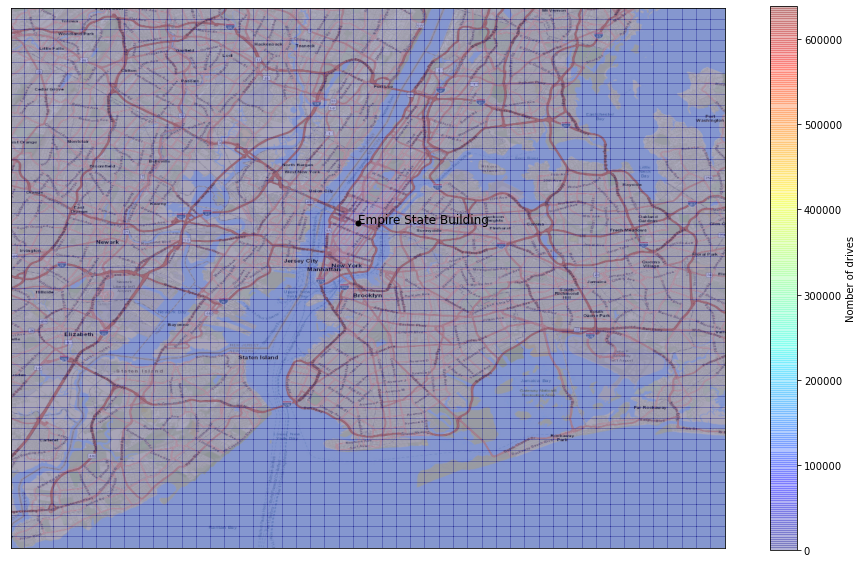

In [12]:
plt.figure(num=None,figsize=(16,10))
m = Basemap(llcrnrlat= NY_south, llcrnrlon = NY_west, 
                 urcrnrlat = NY_north, urcrnrlon= NY_east,
                 projection ='lcc', resolution='i',
                 lat_0 = (NY_north + NY_north)/2.0,
                 lon_0 = (NY_west + NY_east)/2.0, epsg =4326,)

plt.plot(ESB_long,ESB_lat, 'ok', markersize=5)
plt.text(ESB_long,ESB_lat,'Empire State Building', fontsize=12)
m.arcgisimage(service="World_street_map", xpixels=1200,epsg=4269)

m.pcolormesh(x,y,np.array(reg_count).reshape((50,50)).T,
             latlon=True, cmap='jet',vmin=0,vmax=638799, alpha=0.3)
plt.clim(0,638799.0)
plt.colorbar(label='Nomber of drives');
plt.show()

Раскрасим карту так, чтобы районы с малым числом поездок стали видимыми. Для этого применим к датасету выпуклую функцию

In [13]:
def g(x):
    return pow(x,0.1)*pow(858,0.9)

In [14]:
reg_count1=reg_count.apply(g)
max(reg_count1)

1231.267969460674

In [32]:
reg_count1

1.0       0.0
2.0       0.0
3.0       0.0
4.0       0.0
5.0       0.0
         ... 
2496.0    0.0
2497.0    0.0
2498.0    0.0
2499.0    0.0
2500.0    0.0
Length: 2500, dtype: float64

C:\Users\roman\AppData\Roaming\Python\Python38\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


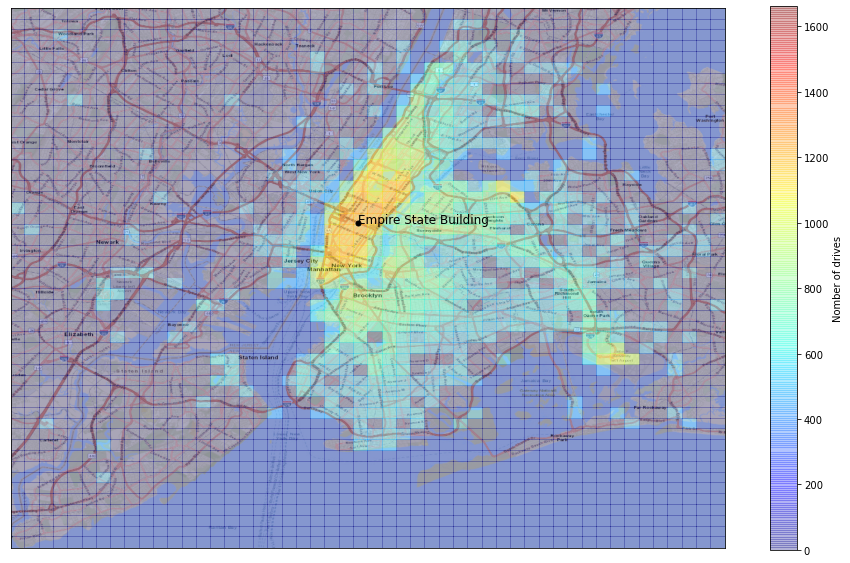

In [15]:
plt.figure(num=None,figsize=(16,10))
m = Basemap(llcrnrlat= NY_south, llcrnrlon = NY_west, 
                 urcrnrlat = NY_north, urcrnrlon= NY_east,
                 projection ='lcc', resolution='i',
                 lat_0 = (NY_north + NY_north)/2.0,
                 lon_0 = (NY_west + NY_east)/2.0, epsg =4326,)

plt.plot(ESB_long,ESB_lat, 'ok', markersize=5)
plt.text(ESB_long,ESB_lat,'Empire State Building', fontsize=12)
m.arcgisimage(service="World_street_map", xpixels=1200,epsg=4269)

m.pcolormesh(x,y,np.array(reg_count1).reshape((50,50)).T,
             latlon=True, cmap='jet', alpha=0.3)
plt.clim(0,1662)
plt.colorbar(label='Nomber of drives');
plt.show()

***4*** Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

***5*** Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

In [24]:
mean_df=agreg.mean(axis=0)
max(mean_df)

42.71370967741935

In [17]:
!pip install branca --user

In [18]:
!pip install foilum --user

ERROR: Could not find a version that satisfies the requirement foilum
ERROR: No matching distribution found for foilum


In [19]:
import branca.colormap as cm

In [20]:
colormap=cm.LinearColormap(colors=['blue','green','yellow','orange','red'],vmin=0,vmax=max(mean_df))
colormap

In [21]:
import folium
map = folium.Map(location=[(NY_north + NY_south)/2.0,(NY_east + NY_west)/2.0], zoom_start = 11)
folium.Marker(location=[SL_lat,SL_lon], popup = "Statue of Liberty", icon=folium.Icon(color = 'gray')).add_to(map)
for i in range(2500):
    folium.Rectangle(bounds=list([(reg.south.iloc[i],reg.west.iloc[i]),
                                  (reg.north.iloc[i],reg.east.iloc[i])]),
                     color=0,fill=True,fill_opacity=0.5, 
                     fill_color=colormap(int(mean_df.iloc[i]))).add_to(map)
map.save("map1.html")
map

***6*** Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.

In [33]:
filt_df=mean_df
filt_df[filt_df<5]=0

In [39]:
filt_df.max()

42.71370967741935

C:\Users\roman\AppData\Roaming\Python\Python38\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


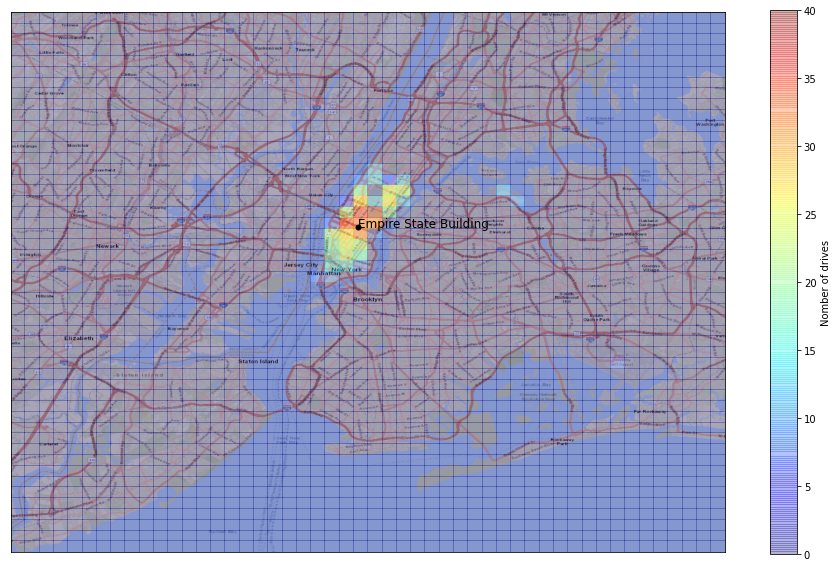

In [41]:
plt.figure(num=None,figsize=(16,10))
m = Basemap(llcrnrlat= NY_south, llcrnrlon = NY_west, 
                 urcrnrlat = NY_north, urcrnrlon= NY_east,
                 projection ='lcc', resolution='i',
                 lat_0 = (NY_north + NY_north)/2.0,
                 lon_0 = (NY_west + NY_east)/2.0, epsg =4326,)

plt.plot(ESB_long,ESB_lat, 'ok', markersize=5)
plt.text(ESB_long,ESB_lat,'Empire State Building', fontsize=12)
m.arcgisimage(service="World_street_map", xpixels=1200,epsg=4269)

m.pcolormesh(x,y,np.array(filt_df).reshape((50,50)).T,
             latlon=True, cmap='jet', alpha=0.3)
plt.clim(0,40)
plt.colorbar(label='Nomber of drives');
plt.show()

In [34]:
mean_df[mean_df>5].to_csv('102.csv', index=False)

In [28]:
len(filt_df)

39

In [30]:
mean_df

1.0       0.0
2.0       0.0
3.0       0.0
4.0       0.0
5.0       0.0
         ... 
2496.0    0.0
2497.0    0.0
2498.0    0.0
2499.0    0.0
2500.0    0.0
Length: 2500, dtype: float64